<a href="https://colab.research.google.com/github/ttlttk8161/-PBL-Reinforcement-learning/blob/main/3_sarsa_share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# State-Action-Reward-State-Action (SARSA) 알고리즘

```text
# SARSA 알고리즘
1. Q(s,a)를 임의의 값으로 초기화
2. 반복:
   a. 현재 상태 s 관찰
   b. 정책에 따라 행동 a 선택 (예: ε-greedy)
   c. 행동 a 실행
   d. 보상 r과 다음 상태 s' 관찰
   e. 다음 상태 s'에서 정책에 따라 다음 행동 a' 선택
   f. Q(s,a) = Q(s,a) + α[r + γQ(s',a') - Q(s,a)]
   g. s = s', a = a'로 갱신
```

In [ ]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 34.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 간단한 그리드 환경 설정 (4x4 격자)
grid_size = 4  # 격자 크기
num_states = grid_size * grid_size  # 전체 상태 개수 (16개)
num_actions = 4  # 행동 개수 (상, 하, 좌, 우)

# 행동 정의 (상: 0, 하: 1, 좌: 2, 우: 3)
actions = [0, 1, 2, 3]
action_names = ['위', '아래', '왼쪽', '오른쪽']

# 목표 상태와 시작 상태 설정
start_state = 0  # 시작 위치 (0,0)
goal_state = 15  # 목표 위치 (3,3)

# SARSA 매개변수 설정
alpha = 0.1  # 학습률 (얼마나 빨리 배울지)
gamma = 0.9  # 할인율 (미래 보상을 얼마나 중요하게 볼지)
epsilon = 0.1  # 탐험률 (얼마나 자주 새로운 행동을 시도할지)
episodes = 1000  # 학습 에피소드 수

# 1. Q(s,a)를 임의의 값으로 초기화
q_table = np.zeros((num_states, num_actions))  # Q테이블을 0으로 초기화
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:

print("Q테이블 초기화 완료!")
print(f"Q테이블 크기: {q_table.shape}")

# 상태를 (행, 열) 좌표로 변환하는 함수 기능을 직접 구현
def state_to_position(state):
    row = state // grid_size
    col = state % grid_size
    return row, col

# (행, 열) 좌표를 상태로 변환하는 함수 기능을 직접 구현
def position_to_state(row, col):
    return row * grid_size + col

# 행동에 따른 다음 상태 계산
def get_next_state(current_state, action):
    row, col = state_to_position(current_state)

    # 행동에 따라 위치 변경
    if action == 0:  # 위로 이동
        row = max(0, row - 1)
    elif action == 1:  # 아래로 이동
        row = min(grid_size - 1, row + 1)
    elif action == 2:  # 왼쪽으로 이동
        col = max(0, col - 1)
    elif action == 3:  # 오른쪽으로 이동
        col = min(grid_size - 1, col + 1)

    return position_to_state(row, col)

# 보상 계산
def get_reward(state):
    if state == goal_state:
        return 100  # 목표에 도달하면 큰 보상
    else:
        return -1   # 다른 곳에서는 작은 벌점

# ε-greedy 정책으로 행동 선택
def choose_action(state, q_table, epsilon):
    if np.random.random() < epsilon:
        # 탐험: 무작위 행동 선택
        return np.random.choice(actions)
    else:
        # 활용: 가장 좋은 행동 선택
        return np.argmax(q_table[state])

# 에피소드별 총 보상 저장할 리스트
episode_rewards = []

print("\nSARSA 학습 시작!")
print("=" * 50)

# 2. 반복 학습 시작
for episode in range(episodes):
    # a. 현재 상태 s 관찰 (시작 상태로 초기화)
    current_state = start_state

    # b. 정책에 따라 행동 a 선택 (ε-greedy)
    current_action = choose_action(current_state, q_table, epsilon)

    total_reward = 0  # 에피소드 총 보상
    steps = 0         # 에피소드 내 스텝 수

    # 한 에피소드 진행
    while current_state != goal_state and steps < 100:  # 최대 100스텝 제한
        # c. 행동 a 실행
        # d. 보상 r과 다음 상태 s' 관찰
        next_state = get_next_state(current_state, current_action)
        reward = get_reward(next_state)

        # e. 다음 상태 s'에서 정책에 따라 다음 행동 a' 선택
        next_action = choose_action(next_state, q_table, epsilon)

        # f. Q(s,a) = Q(s,a) + α[r + γQ(s',a') - Q(s,a)] (SARSA 업데이트)
        old_q_value = q_table[current_state, current_action]
        next_q_value = q_table[next_state, next_action]

        # [TODO] SARSA 업데이트에서 TD 오차를 계산하세요
        # TD 오차 = r + γQ(s',a') - Q(s,a)
        td_error = _____ + _____ * _____ - _____

        # [TODO] Q값을 업데이트하세요
        # Q(s,a) = Q(s,a) + α * TD_error
        q_table[current_state, current_action] = _____ + _____ * _____

        # g. s = s', a = a'로 갱신
        # [TODO] 현재 상태와 행동을 다음 상태와 행동으로 업데이트하세요
        current_state = _____
        current_action = _____

        total_reward += reward
        steps += 1

    episode_rewards.append(total_reward)

    # 100 에피소드마다 진행상황 출력
    if (episode + 1) % 100 == 0:
        avg_reward = np.mean(episode_rewards[-100:])
        print(f"에피소드 {episode + 1}: 평균 보상 = {avg_reward:.2f}")

print("\n학습 완료!")
print("=" * 50)
# Q-table을 이쁘게 출력
print("\n📊 최종 Q-테이블")
import pandas as pd

# Q테이블을 DataFrame으로 변환
q_data = []
for state in range(num_states):
    row, col = state_to_position(state)
    q_values = q_table[state]
    q_data.append({
        '상태': f"({row},{col})",
        '상': f"{q_values[0]:.3f}",
        '하': f"{q_values[1]:.3f}",
        '좌': f"{q_values[2]:.3f}",
        '우': f"{q_values[3]:.3f}"
    })

# DataFrame 생성
q_df = pd.DataFrame(q_data)

# 각 행에서 최대값에 색상 적용
def highlight_max(s):
    # 숫자 컬럼만 선택 (상, 하, 좌, 우)
    numeric_cols = ['상', '하', '좌', '우']
    numeric_values = s[numeric_cols].astype(float)

    # 최대값 찾기
    max_val = numeric_values.max()

    # 스타일 적용
    styles = [''] * len(s)
    for i, col in enumerate(numeric_cols):
        if float(s[col]) == max_val:
            styles[i+1] = 'background-color: yellow; font-weight: bold'

    return styles

# 스타일 적용하여 출력
styled_df = q_df.style.apply(highlight_max, axis=1)
display(styled_df)

Q테이블 초기화 완료!
Q테이블 크기: (16, 4)

SARSA 학습 시작!


NameError: name '_____' is not defined

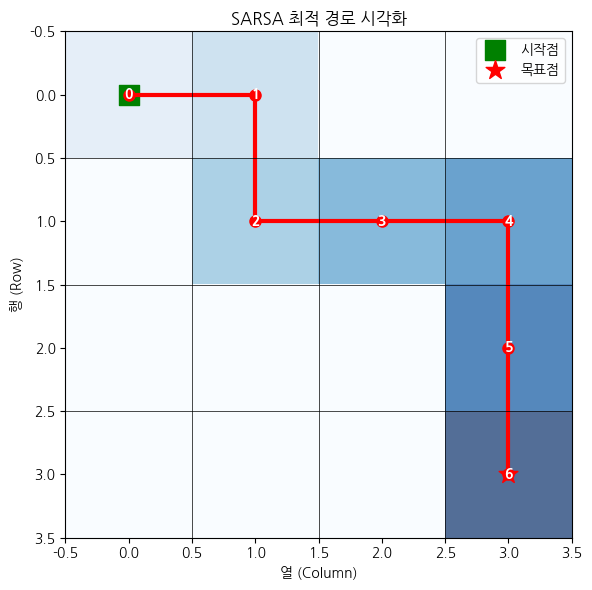

In [ ]:
# 최적 경로 찾기
# 최적 경로 찾기
current_state = start_state
path = [current_state]
steps = 0

while current_state != goal_state and steps < 20:
    # 가장 좋은 행동 선택 (탐험 없이)
    best_action = np.argmax(q_table[current_state])
    current_state = get_next_state(current_state, best_action)
    path.append(current_state)
    steps += 1

# 최적 경로 시각화
plt.figure(figsize=(8, 6))

# 그리드 생성
grid_visual = np.zeros((grid_size, grid_size))

# 경로 표시
for i, state in enumerate(path):
    row, col = state_to_position(state)
    grid_visual[row, col] = i + 1

# 히트맵으로 경로 시각화
plt.imshow(grid_visual, cmap='Blues', alpha=0.7)

# 경로 선 그리기
path_rows = [state_to_position(state)[0] for state in path]
path_cols = [state_to_position(state)[1] for state in path]
plt.plot(path_cols, path_rows, 'r-', linewidth=3, marker='o', markersize=8)

# 시작점과 목표점 강조
start_row, start_col = state_to_position(start_state)
goal_row, goal_col = state_to_position(goal_state)
plt.scatter(start_col, start_row, color='green', s=200, marker='s', label='시작점')
plt.scatter(goal_col, goal_row, color='red', s=200, marker='*', label='목표점')

# 격자 표시
for i in range(grid_size + 1):
    plt.axhline(y=i-0.5, color='black', linewidth=0.5)
    plt.axvline(x=i-0.5, color='black', linewidth=0.5)

# 각 단계 번호 표시
for i, state in enumerate(path):
    row, col = state_to_position(state)
    plt.text(col, row, str(i), ha='center', va='center',
             fontsize=10, fontweight='bold', color='white')

plt.title('SARSA 최적 경로 시각화')
plt.xlabel('열 (Column)')
plt.ylabel('행 (Row)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

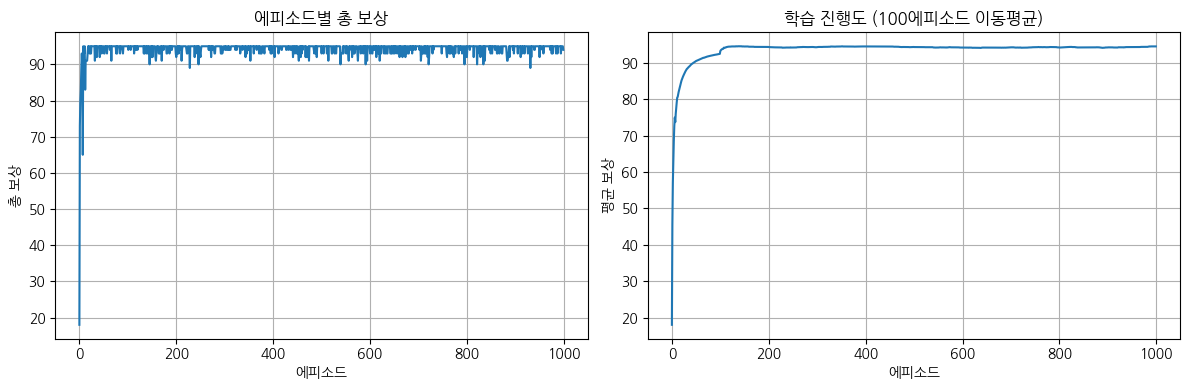

In [ ]:


# 학습 곡선 그래프
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.title('에피소드별 총 보상')
plt.xlabel('에피소드')
plt.ylabel('총 보상')
plt.grid(True)

# 100에피소드 이동평균
plt.subplot(1, 2, 2)
window_size = 100
moving_avg = []
for i in range(len(episode_rewards)):
    start_idx = max(0, i - window_size + 1)
    moving_avg.append(np.mean(episode_rewards[start_idx:i+1]))

plt.plot(moving_avg)
plt.title('학습 진행도 (100에피소드 이동평균)')
plt.xlabel('에피소드')
plt.ylabel('평균 보상')
plt.grid(True)

plt.tight_layout()
plt.show()


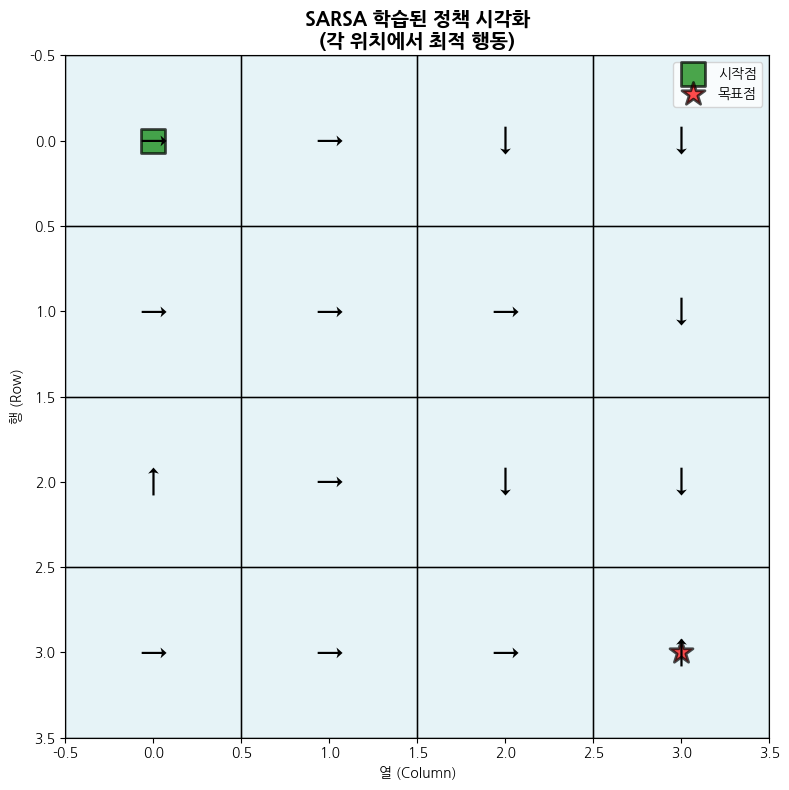

시작점: (0,0), 목표점: (3,3)
화살표는 각 위치에서 학습된 최적 행동을 나타냅니다.


In [ ]:

# 최종 정책 시각화
# 최종 정책 시각화 (그래프)
plt.figure(figsize=(8, 8))

# 정책 격자 생성
policy_grid = np.zeros((grid_size, grid_size), dtype=int)
for state in range(num_states):
    row, col = state_to_position(state)
    policy_grid[row, col] = np.argmax(q_table[state])

# 격자 배경 그리기
for i in range(grid_size):
    for j in range(grid_size):
        plt.fill([j-0.5, j+0.5, j+0.5, j-0.5],
                 [i-0.5, i-0.5, i+0.5, i+0.5],
                 color='lightblue', alpha=0.3, edgecolor='black')

# 화살표 그리기
arrow_symbols = ['↑', '↓', '←', '→']
arrow_dx = [0, 0, -0.3, 0.3]
arrow_dy = [0.3, -0.3, 0, 0]

for row in range(grid_size):
    for col in range(grid_size):
        action = policy_grid[row, col]
        # 화살표 텍스트로 표시
        plt.text(col, row, arrow_symbols[action],
                ha='center', va='center', fontsize=20, fontweight='bold')

# 시작점과 목표점 표시
start_row, start_col = 0, 0
goal_row, goal_col = grid_size-1, grid_size-1

plt.scatter(start_col, start_row, color='green', s=300, marker='s',
           label='시작점', alpha=0.7, edgecolors='black', linewidth=2)
plt.scatter(goal_col, goal_row, color='red', s=300, marker='*',
           label='목표점', alpha=0.7, edgecolors='black', linewidth=2)

# 격자선 그리기
for i in range(grid_size + 1):
    plt.axhline(y=i-0.5, color='black', linewidth=1)
    plt.axvline(x=i-0.5, color='black', linewidth=1)

plt.xlim(-0.5, grid_size-0.5)
plt.ylim(-0.5, grid_size-0.5)
plt.gca().invert_yaxis()  # y축 뒤집기 (행 번호와 일치)
plt.title('SARSA 학습된 정책 시각화\n(각 위치에서 최적 행동)', fontsize=14, fontweight='bold')
plt.xlabel('열 (Column)')
plt.ylabel('행 (Row)')
plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()

print(f"시작점: (0,0), 목표점: ({grid_size-1},{grid_size-1})")
print("화살표는 각 위치에서 학습된 최적 행동을 나타냅니다.")


